# Estatística Prática para Cientistas de Dados

Este notebook são anotações a partir da leitura do livro "Estatística Prática para Cientistas de Dados" de Peter Bruce e Andrew Bruce.

"_A disciplina de estatística se desenvolveu muito no último século. A teoria das probabilidades - o fundamento matemáticoda estatística - foi desenvolvida nos séculos XVII e XIX com base no trabalho de Thomas Bayes, Pierre-Simon Laplace e Carl Gauss. Ao contrário da natureza puramente teórica da probabilidade, a estatística é uma teoria aplicada, relacionada à análise e modelagem de dados._"

A diferença entre a **estatística** e a **ciência de dados** se reflete em diferentes abordagens. Enquanto a estatística tem na _contabilização das incertezas_ um dos centros da disciplina, a ciência de dados se foca em objetos concretos corporativos ou organizacionais.

In [2]:
# Bibliotecas importantes para o notebook

from random import randint
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


l = []
j = []
for v in range(100):
    x = randint(1,10)
    y = randint(7,19)
    l.append(x)
    j.append(y)
arr = np.array(j)


iris = sns.load_dataset('iris')

In [3]:
len(j)

100

In [4]:
# Usamos aqui o watermark para varrer o notebook e apontar quais pacotes e versões estamos usando
# Isso é útil na hora de colocar isso no [binder](https://mybinder.org/) para que fique tudo certinho no requirements.txt

%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p random,pandas,numpy,scipy,seaborn,matplotlib,watermark 

# date
print (" ")
%watermark -u -n -t -z 

CPython 3.7.6
IPython 7.16.1

random unknown
pandas 1.0.5
numpy 1.18.5
scipy 1.5.0
seaborn 0.10.1
matplotlib 3.2.2
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
 
last updated: Tue Sep 08 2020 12:10:45 -03


## Análise exploratória 

É um campo relativamente novo dentro da Estatística e nasce com o livro _Exploratory Data Analysis_ (Tukey 1977)

É o exame prévio dos dados e que aponta para informações como máximo, mínimo, moda, média, mediana, quartis, amplitude, intervalo-interquartil, variância, desvio padrão, coeficiente de variação, tabelas de frequência etc.

Também são muito úteis análises visuais como gráficos de barras, de setores, histograma, boxplot, gráfico de linha (sequência), polígono de frequências, diagrama de dispersão.

In [5]:
# Se estiver trabalhando com o _dataset_ quais são as dimensões dele?
print("O dataset Iris tem o formato:",iris.shape)
print("Ou seja, 150 linhas por 5 colunas.")

print('\n###############\n')

print('As colunas que temos são:', iris.columns,'\n')

print('E as primeiras 3 linhas tem esse formato:')
display(iris.head(3))

print('\n###############\n')

print("O dataset Iris fala de flores. Quais são os tipode de flores e quantas delas temos?")
display(iris['species'].value_counts())

O dataset Iris tem o formato: (150, 5)
Ou seja, 150 linhas por 5 colunas.

###############

As colunas que temos são: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 

E as primeiras 3 linhas tem esse formato:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa



###############

O dataset Iris fala de flores. Quais são os tipode de flores e quantas delas temos?


setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

## Tipos de Dados

**Contínuos**
- Dados que podem assumir qualquer valor em um intervalo

**Discretos**
- Dados que podem assumir apenas valores inteiros, como contagens

**Categóricos**
- Dados que podem assumir apenas um conjunto específico de valores representando um conjunto possível de categorias

**Binários**
- Dados categóricos com apenas duas categorias

**Ordinais**
- Dados categóricos que tem ordem explicita

## Estimativas de Localização
 
**Média**
- Soma de todos valores, dividida pelo número de valores.

**Média Ponderada**
- Soma de todos valores, multiplicada por um peso e dividida pela soma dos pesos.

**Mediana**
- O valor que ocupa a posição central dos dados.
- 50º percentil

**Mediana Ponderada**
- Valor cuja posição está no centro da soma dos pesos, estando metade da soma antes e metade depois desse dado.

**Média aparada**
- A média de todos os valores depois da exclusão de um número fixo de valores extremos.
- Ex.: Dentre cinco notas retiramos a máxima, a mínima e faz-se a média com as outras 3.

**Robusto**
- Não sensível a valores extremos.

**_Outlier_**
- Um valor de dados que é muito diferente da maioria dos dados.

In [6]:
# O python facilita na hora de tirar boa parte das estimativas de localização
# Em caso de preguiça dá para usar o stats.describe(x) para listas e arrays ou o x.describe() para dataframes

print("Descrevendo a lista l temos:")
display(stats.describe(l))

print("\nDescrevendo a array arr temos:")
#display(stats.describe(arr))
display(stats.describe(arr))

print("\nDescrevendo o dataframe iris temos:")
print("*Lembre que o 50% é a Mediana.")
# print("**Lembre também ele não vai descrever dados categóricos.") -> Conferir
display(iris.describe())

Descrevendo a lista l temos:


DescribeResult(nobs=100, minmax=(1, 10), mean=5.24, variance=7.881212121212123, skewness=0.2123699535409176, kurtosis=-1.0899845374852997)


Descrevendo a array arr temos:


DescribeResult(nobs=100, minmax=(7, 19), mean=13.24, variance=13.881212121212124, skewness=-0.06494082970921748, kurtosis=-1.1955154524910974)


Descrevendo o dataframe iris temos:
*Lembre que o 50% é a Mediana.


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Média
Soma de todos valores, dividida pelo número de valores.

![Média](imgs/media.png)

In [7]:
print("A média da lista l é:", np.mean(l))

np.mean(iris[['petal_length']])

A média da lista l é: 5.24


petal_length    3.758
dtype: float64

### Trimmed Mean

In [8]:
# trimmed mean ou média aparada
display(stats.trim_mean(arr, 0.1))

display(stats.trim_mean(iris[['petal_length']],0.2))

13.25

array([3.84222222])

### Weighted Mean - Média ponderada

In [9]:
# Média ponderada
display(np.average(np.arange(21, 31), weights=np.arange(10, 0, -1)))

display(np.average(iris[['petal_length']], weights=iris[['petal_width']]))

24.0

4.83107281823235

### Median - Mediana 

É o número central de uma lista ordenada.

In [10]:
display(np.median(l))

display(np.median(iris[['petal_length']]))

5.0

4.35

## Estimativas de Variância

Medidas de variância ou dispersão são formas de medir quão compactados ou dispersos estão os dados.

São esimativas muito sensíveis a _outliers_.

**Amplitude**
- Diferença entre o maior e o menor valor em seu conjunto de dados.

**Percentil**
- Valor tal que P por cento dos valores assuam esse valor ou menos, e (100 - P) por cento assumam esse valor ou mais

**Amplitude interquartilica**
- A diferença entre o 75º percentil e 25º percentil.

### Desvio-padrão e estimativas relacionadas

São baseadas nos desvios entre a estimativa de localização e o dado observado.

#### Mean absolute deviation - Desvio absoluto médio

#### Variance - Variância e Standard deviation - Desvio padrão

Variância é a média dos desvios quadráticos e o desvio-padrão é a raiz quadrada da variância.


In [11]:
# Variância

display(np.var(arr))

display(np.var(iris['petal_length']))

13.742400000000002

3.0955026666666674

In [12]:
# Desvio-padrão

display(np.std(arr))

display(np.std(iris['petal_length']))

3.7070743181112515

1.7594040657753032

In [13]:
iris['petal_length'].mad()

1.5627466666666645

## Explorando a Distribuição de Dados

Cada uma das estimativas resumem os dados em um único número que descrevem a localização ou variabilidade dos dados.

Text(0.5, 1.0, 'Petal Length')

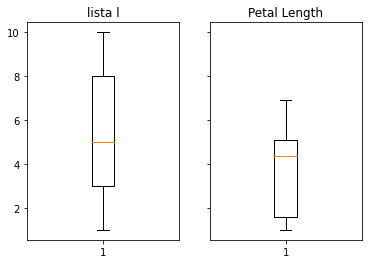

In [14]:
# Boxplot


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.boxplot(l)
ax1.set_title('lista l')
ax2.boxplot(iris['petal_length'])
ax2.set_title('Petal Length')


#plt.boxplot(l)

In [15]:
# Tabela de frequências

print("O dataset Iris fala de flores. Quais são os tipode de flores e quantas delas temos?")
display(iris['species'].value_counts())

O dataset Iris fala de flores. Quais são os tipode de flores e quantas delas temos?


setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

Text(0.5, 1.0, 'Petal Length')

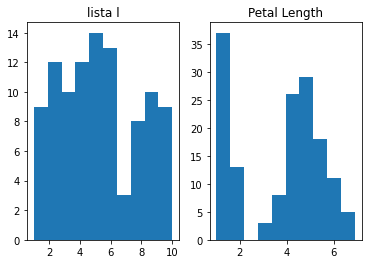

In [19]:
# Histograma

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(l)
ax1.set_title('lista l')
ax2.hist(iris['petal_length'])
ax2.set_title('Petal Length')

#plt.hist(iris['petal_length'])

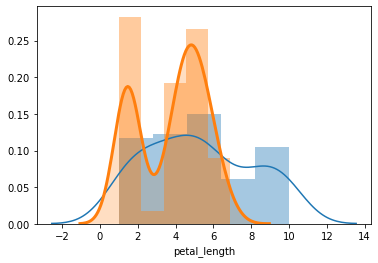

In [34]:
# Gráfico de Densidade
# É uma espécie de simplificação do histograma

display(sns.distplot(l))

display(sns.distplot(iris['petal_length'], hist = True, kde_kws = {'shade': True, 'linewidth':3}, label=iris['species']))